In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from dataset_load import path as dataset_path

First we need to import the dataset.


In [10]:
data_raw = pd.read_csv(dataset_path + "\data\creditcard_csv.csv")

strip_then_int = lambda s: int(s.replace("'", ""))

data_raw['Class'] = data_raw['Class'].apply(strip_then_int)

X = data_raw.iloc[:, :-1]
y = data_raw.iloc[:, -1]

data_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Split the dataset to 80:20 ratio of train and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True,stratify=y)

**Visualization**

We will visualize the whole data set as opposed to just the X_train or just X_test (this will give us better insight to the whole data not just the training set)

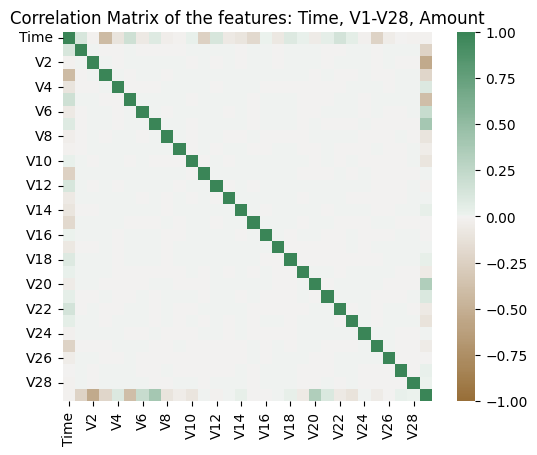

In [12]:
corr_matrix = data_raw.iloc[:, :-1].corr()      ## without the 'Class' column

axis_corr = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.title("Correlation Matrix of the features: Time, V1-V28, Amount")
plt.show()

Seems like the features: 'Time' and 'Amount' have correlation with the features V1-V28,
all the other features don't have correlation between them

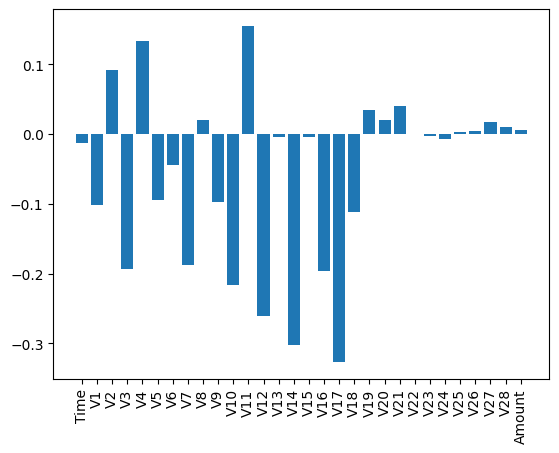

In [13]:
corr_matrix_with_target = data_raw.corrwith(data_raw["Class"]).drop('Class') ## drop 'Class' because corr is 1

plt.bar(corr_matrix_with_target.index, corr_matrix_with_target)
plt.xticks(rotation=90)
plt.show()

**Applying Naive Bayes**
- The most simple algorithm and has high interoperability
- Naive Bayes assumes independence between features (That's why it's 'Naive')
- Bernoulli assumes binary features (might binarize if not binary already)

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

bnb = BernoulliNB()

In [15]:
## util functions

def print_report(y_true, y_pred):
    """
    This function prints the classification report.
    :param y_true:
    :param y_pred:
    :return:
    """
    print(classification_report(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True)

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.show()

def print_roc(y_true, y_probs):
    """
    This function prints the ROC curve & prints the ROC AUC score to the console.
    :param y_true:
    :param y_probs:
    :return:
    """
    # print(f"AUC-ROC Score: {roc_auc_score(y_test, y_probs)}")

    # Plotting the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Now we will evaluate the prediction, we will use precision & recall as the main metric because the dataset is highly imbalanced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.63      0.71        98

    accuracy                           1.00     56962
   macro avg       0.90      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962



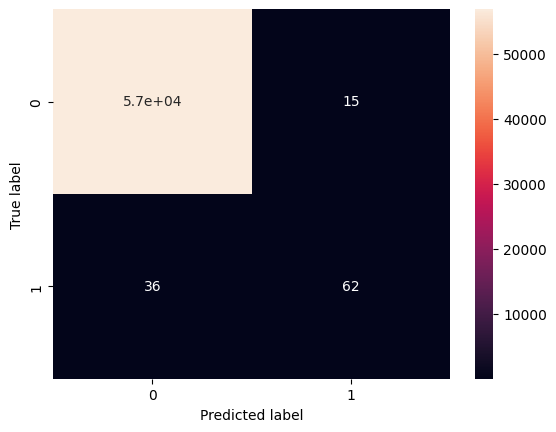

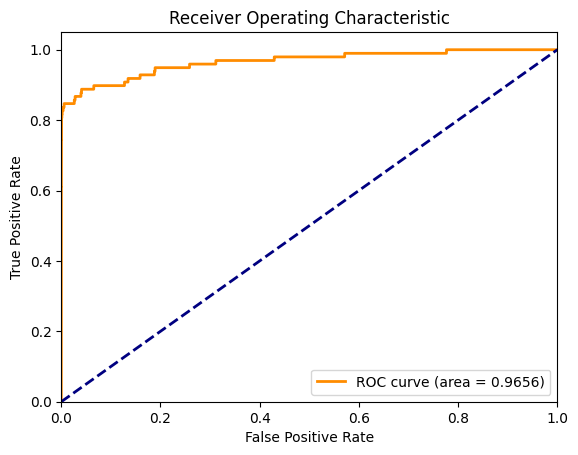

In [16]:
y_pred = bnb.fit(X_train, y_train).predict(X_test)
y_probs = bnb.predict_proba(X_test)[:, 1]

print_report(y_test, y_pred)
print_roc(y_test, y_probs)

**Results**
- Accuracy is very high - BUT it doesn't tell us whether the model is good or not because the dataset is so unbalanced
- Precision & Recall -

**Train a Logistic Regression Model:**
Now we will train a Logistic Regression model using our resampled training data. We use class_weight='balanced' to handle class imbalance, ensuring the model pays more attention to fraud cases.


In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_res, y_res)

NameError: name 'X_res' is not defined

**Make Predictions on the Test Set:**
Next, we use the trained model to predict fraud on the test data. We also obtain probability scores for each prediction, which are useful for visualizing ROC and precision-recall curves.

In [ ]:
# Predict class labels
y_pred = lr.predict(X_test_scaled)

# Predict probability scores (for evaluation curves)
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

**Evaluate Model Performance (Scores and Reports):**
Let's check how well our model performs. We print the classification report, ROC AUC score, and the confusion matrix to understand its strengths and weaknesses.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

**Visualize the Results:**
Finally, let's visualize the model's performance using the ROC curve and the Precision-Recall curve. These plots help us understand the trade-off between correctly detecting fraud and avoiding false alarms.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test, ax=axes[0])
axes[0].set_title('ROC Curve')

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr, X_test_scaled, y_test, ax=axes[1])
axes[1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()